In [2]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt


def image_preprocess(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]
    return thresh


def get_text_from_image(thresh_image):
    return pytesseract.image_to_string(thresh_image, lang='eng')


def recognize_id_card(image_path):
    thresh_image = image_preprocess(image_path)
    text = get_text_from_image(thresh_image)
    lines = text.split('\n')
    data = pd.DataFrame(lines, columns=['Extracted Text'])

    data = data[data['Extracted Text'].str.strip() != ""]

    return data


def display_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


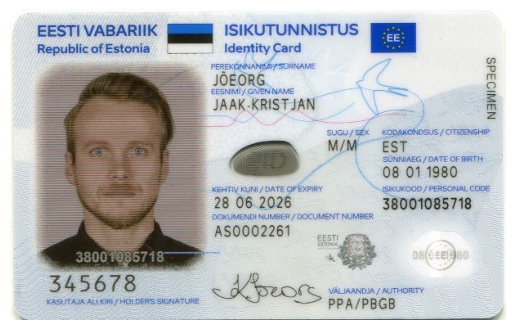

,Extracted Text
0,EESTI VABARIIK J ISIKUTUNNISTUS
1,Republic of Estonia (dentity Card
2,", ERECONANIREY/SURSLAME"
4,JOEORG
6,Fiseine 7 GIVEN NAME
8,JAAK-KRIST IAN
10,NaWI9a¢ds
12,SUGI/ SEK KODAKONDSUS / CTIZENSHI
14,Ze mE
15,SUNNAEG / DATE OF BATH


In [7]:
img_path = '/home/fox/CodingArea/ComputerVisionBasics/New_Estonian_ID_card.jpg'

display_image(img_path)
result_data = recognize_id_card(image_path=img_path)
result_data